<a href="https://colab.research.google.com/github/robd123/AML/blob/main/CV/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from time import time

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from datetime import datetime

In [ ]:
which = 3
out_file = 'cifar10'
print( 'input data: ', out_file )
class_names = [ 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck' ] 
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
train_labels = train_labels.flatten()
test_labels  = test_labels.flatten()
channels = 3  #gray=1; rgb=3

first 25 training images (as gray data)


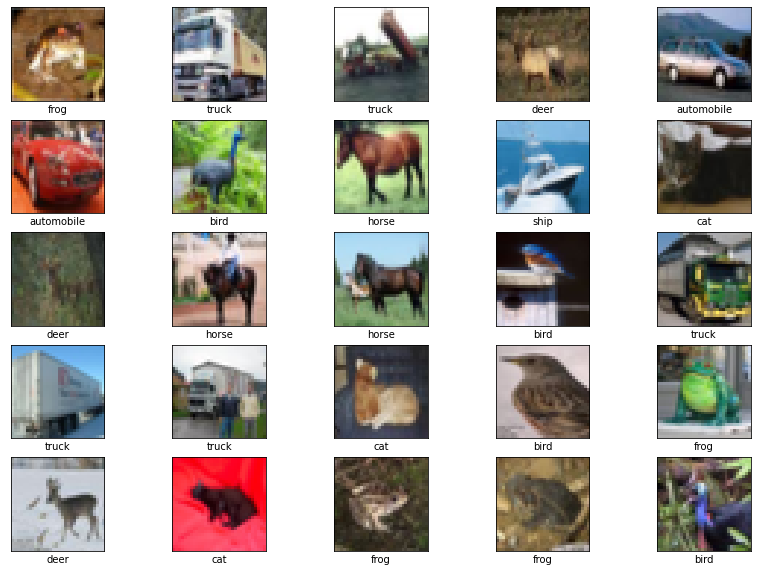

In [ ]:
print( 'first 25 training images (as gray data)' )
plt.figure( figsize=(14, 10), num='first 25 training images' )
plt.title( 'first 25 training images (shown as gray data' )
for i in range( 25 ):
    plt.subplot( 5, 5, i+1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.imshow( train_images[i], cmap=plt.cm.gray, interpolation='nearest' )
    plt.xlabel( class_names[int(train_labels[i])] )
plt.show()

In [ ]:
if channels == 1:  # 1 == gray
    i = 20  #image 20
    rows = len( train_images[i] )
    line = train_images[i][rows//2]
    print( line )
    plt.imshow( train_images[i], cmap=plt.cm.gray, interpolation='nearest' )
    plt.show()
    plt.plot( line )
    plt.show()

    i = 200  #image 200
    rows = len( train_images[i] )
    line = train_images[i][rows//2]
    print( line )
    plt.imshow( train_images[i], cmap=plt.cm.gray, interpolation='nearest' )
    plt.show()
    plt.plot( line )
    plt.show()

first 25 training images (as binary data)


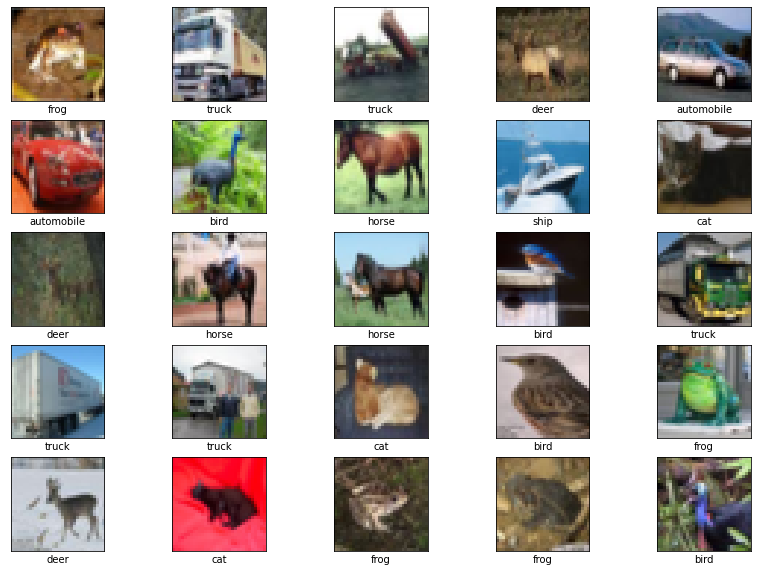

In [ ]:
#show first 25 training images (as binary data)
print( 'first 25 training images (as binary data)' )
plt.figure( figsize=(14, 10), num='first 25 training images' )
plt.title( 'first 25 training images (shown as binary data' )
for i in range( 25 ):
    plt.subplot( 5, 5, i+1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.imshow( train_images[i], cmap=plt.cm.binary, interpolation='nearest' )
    plt.xlabel( class_names[int(train_labels[i])] )
plt.show()


**TODO #1 - Use a Randomized 80/20 Split for Training and Test Data**

In [ ]:
X = np.concatenate((train_images, test_images), axis = 0)
Y = np.concatenate((train_labels, test_labels), axis = 0)

print(X.shape)
print(Y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

#Keep these since they are used later.  Reassign them to the new randomly split data
train_images = x_train
train_labels = y_train
test_images = x_test
test_labels = y_test

print( "# of training images and their size:", train_images.shape       )
print( "# of training labels and their size:", train_labels.shape, "\n" )

print( "# of testing images and their size:",  test_images.shape        )
print( "# of testing labels and their size:",  test_labels.shape        )

(60000, 32, 32, 3)
(60000,)
# of training images and their size: (48000, 32, 32, 3)
# of training labels and their size: (48000,) 

# of testing images and their size: (12000, 32, 32, 3)
# of testing labels and their size: (12000,)


I switched this one to a bar graph because I couldn't get the x-axis tick labels to align properly with the bars on plt.hist()

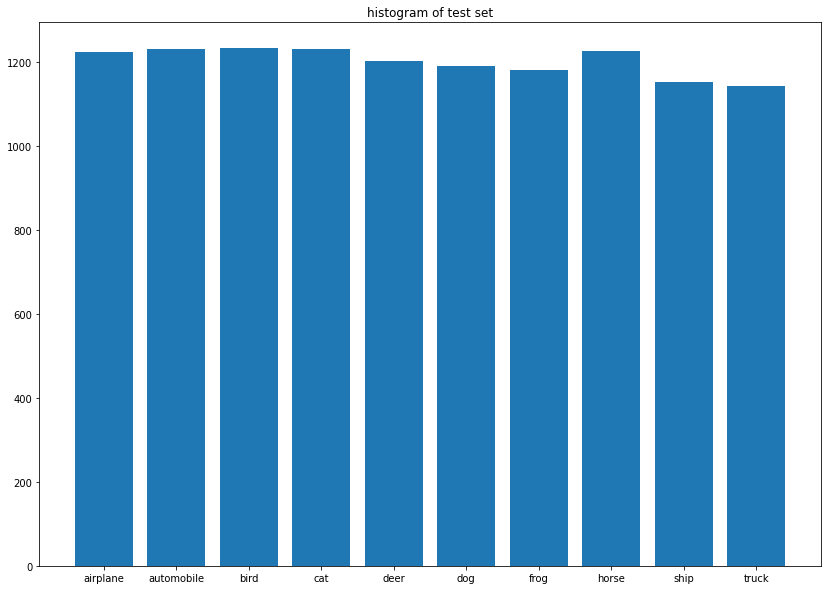

In [ ]:
test_hist = np.histogram( test_labels, len(class_names) )[0]
plt.figure( figsize=(14,10) )
plt.title( 'histogram of test set' )
plt.bar( class_names,test_hist )
plt.show()


[4778 4771 4768 4771 4799 4810 4821 4774 4849 4859]


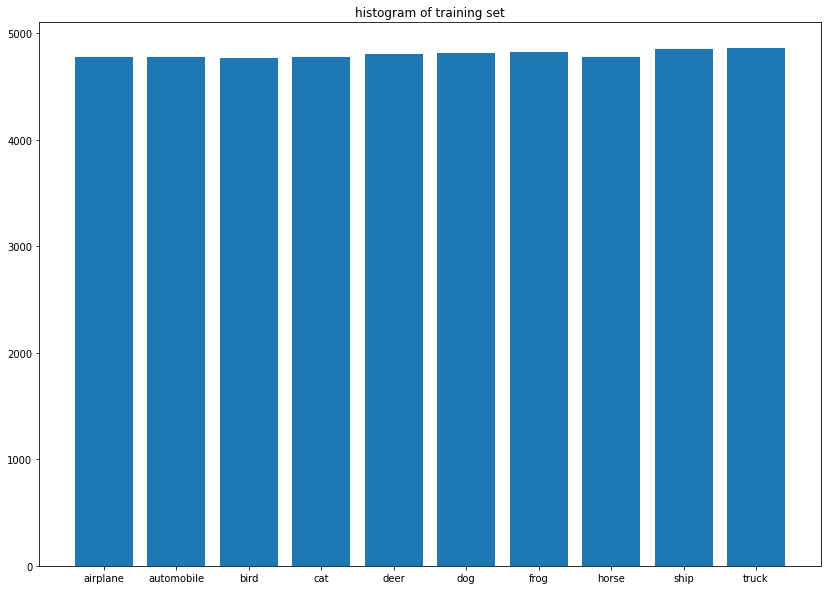

In [ ]:
h = np.histogram( train_labels, len(class_names) )[0]
print( h )
plt.figure( figsize=(14,10) )
plt.title( 'histogram of training set' )
plt.bar( class_names, h )
plt.show()

[1222 1229 1232 1229 1201 1190 1179 1226 1151 1141]


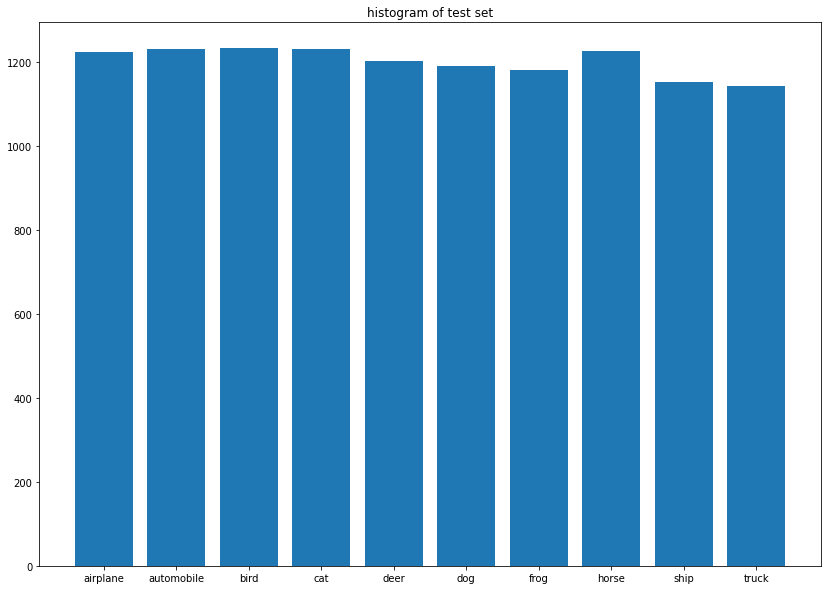

In [ ]:
h = np.histogram( test_labels, len(class_names) )[0]
print( h )
plt.figure( figsize=(14,10) )
plt.title( 'histogram of test set' )
plt.bar( class_names, h )
plt.show()


In [ ]:
img_rows    = x_train.shape[1]
img_cols    = x_train.shape[2]
input_shape = (img_rows, img_cols, channels)    #channels = 1 for gray (3 for color/rgb)

t1 = np.min( x_train )
t2 = np.min( x_test )
mn = np.min( [t1, t2] )

t1 = np.max( x_train )
t2 = np.max( x_test )
mx = np.min( [t1, t2] )

print( 'rows =', img_rows )
print( 'cols =', img_cols )
print( 'channels =', channels, '\n' )
print( 'min =', mn )
print( 'max =', mx )

rows = 32
cols = 32
channels = 3 

min = 0
max = 255


In [ ]:
print( '# of training images: ', len(x_train) )
print( 'shape before: ', x_train.shape )

#prep training images
x_train = x_train.reshape( x_train.shape[0], img_rows, img_cols, channels )
x_train = x_train.astype( 'float32' )

assert mx == 255, "check range of data values"
x_train /= 255.0  #normalize

print( 'shape after: ', x_train.shape )

"""### prep testing"""

print( '# of testing images: ', len(x_test) )
print( 'shape before: ', x_test.shape )


# of training images:  48000
shape before:  (48000, 32, 32, 3)
shape after:  (48000, 32, 32, 3)
# of testing images:  12000
shape before:  (12000, 32, 32, 3)


In [ ]:
#prep testing images
x_test = x_test.reshape( x_test.shape[0], img_rows, img_cols, channels )
x_test = x_test.astype( 'float32' )
assert mx == 255, "check range of data values"
x_test /= 255.0  #normalize

In [ ]:
print( 'create new model' )
print( 'input shape: ', input_shape )
model = keras.Sequential()
model.add( keras.layers.Flatten( input_shape=input_shape ) )
model.add( keras.layers.Dense( 128,              activation='relu'    ) )
model.add( keras.layers.Dense( len(class_names), activation='softmax' ) )
model.compile( optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'] )

model.summary()

create new model
input shape:  (32, 32, 3)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


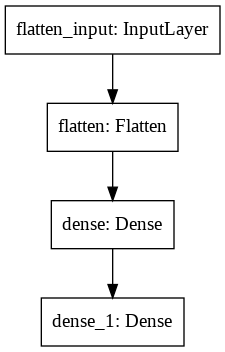

In [ ]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96 )


In [ ]:
print( '\ntesting all test images (before any training) ...' )
test_loss, test_acc = model.evaluate( x_test, y_test )
print( "loss=" + str(test_loss) + ", test acc=" + str(test_acc) + "\n" )

# Define the Keras TensorBoard callback.
logdir = "logs/fit/" + datetime.now().strftime( "%Y%m%d-%H%M%S" )
tensorboard_callback = keras.callbacks.TensorBoard( log_dir=logdir )


testing all test images (before any training) ...
375/375 [==============================] - 1s 2ms/step - loss: 2.5082 - accuracy: 0.0640
loss=2.495422124862671, test acc=0.06366666406393051



**TODO #2 - Train Model, Use Test Data for Validation**

---
Validation data does not affect the training of the model, it just provides metrics, so the test set can be used for validation.


In [ ]:
print( "training ... \n" )
ep = 100
start = time()
h = model.fit( x_train, y_train, epochs=ep, callbacks=[tensorboard_callback],  validation_data=(x_test, y_test))
elapsed_training_time = time() - start

training ... 

Epoch 1/100
1500/1500 [==============================] - 8s 5ms/step - loss: 1.8912 - accuracy: 0.3250 - val_loss: 1.7729 - val_accuracy: 0.3762
Epoch 2/100
1500/1500 [==============================] - 7s 4ms/step - loss: 1.7531 - accuracy: 0.3728 - val_loss: 1.7195 - val_accuracy: 0.3842
Epoch 3/100
1500/1500 [==============================] - 7s 4ms/step - loss: 1.6954 - accuracy: 0.3929 - val_loss: 1.7033 - val_accuracy: 0.3926
Epoch 4/100
1500/1500 [==============================] - 7s 4ms/step - loss: 1.6651 - accuracy: 0.4024 - val_loss: 1.7021 - val_accuracy: 0.3898
Epoch 5/100
1500/1500 [==============================] - 7s 4ms/step - loss: 1.6405 - accuracy: 0.4128 - val_loss: 1.6713 - val_accuracy: 0.4098
Epoch 6/100
1500/1500 [==============================] - 7s 5ms/step - loss: 1.6218 - accuracy: 0.4168 - val_loss: 1.6787 - val_accuracy: 0.4061
Epoch 7/100
1500/1500 [==============================] - 7s 4ms/step - loss: 1.6040 - accuracy: 0.4247 - val_loss: 

In [ ]:
model.save('cifar_shallow.h5')

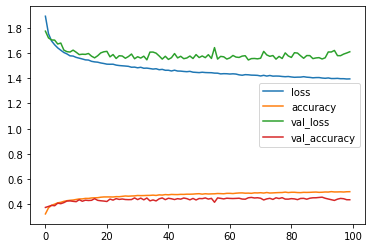

In [ ]:
pd.DataFrame(model.history.history).plot()

In [ ]:
print(elapsed_training_time)

657.8398444652557


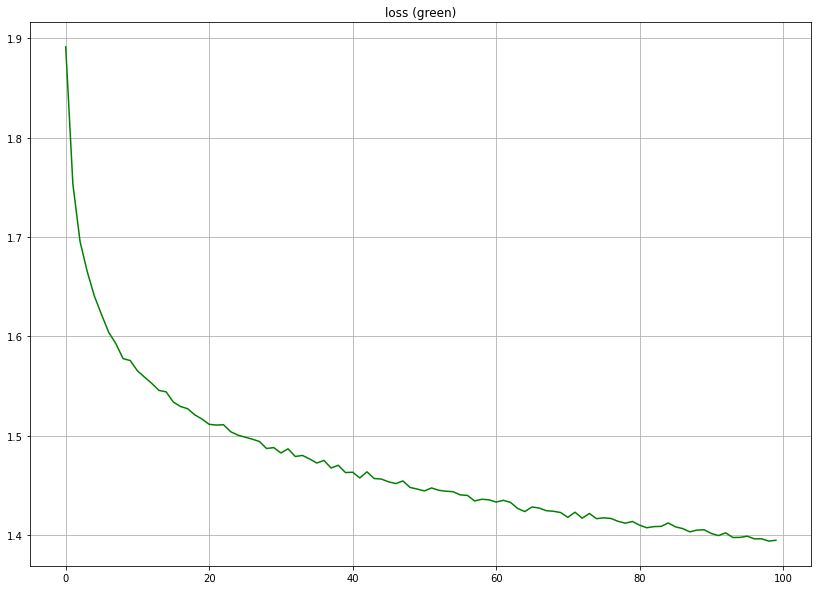

loss: [1.8911992311477661, 1.753069519996643, 1.695397138595581, 1.665132761001587, 1.6404645442962646, 1.621781587600708, 1.6040276288986206, 1.5925430059432983, 1.5776150226593018, 1.5756582021713257, 1.565325140953064, 1.5589311122894287, 1.5526578426361084, 1.5456074476242065, 1.544177770614624, 1.5339397192001343, 1.5294896364212036, 1.527215600013733, 1.5210165977478027, 1.5167901515960693, 1.5114967823028564, 1.510788083076477, 1.5110892057418823, 1.5040769577026367, 1.5006438493728638, 1.4986042976379395, 1.496609091758728, 1.4942582845687866, 1.4871838092803955, 1.4881021976470947, 1.4827117919921875, 1.486859679222107, 1.4791557788848877, 1.4802296161651611, 1.4766695499420166, 1.4725970029830933, 1.475155234336853, 1.467544436454773, 1.4703320264816284, 1.462985634803772, 1.463331699371338, 1.4575750827789307, 1.4637130498886108, 1.4570101499557495, 1.456447958946228, 1.4537203311920166, 1.451891303062439, 1.4545434713363647, 1.448027491569519, 1.446381688117981, 1.444488167

In [ ]:
#report and plot loss
plt.figure( figsize=(14,10) )
plt.grid();  plt.title( 'loss (green)' );       
plt.plot( h.history['loss'],     'g' ); 
plt.show()
print( "loss:", h.history["loss"] )

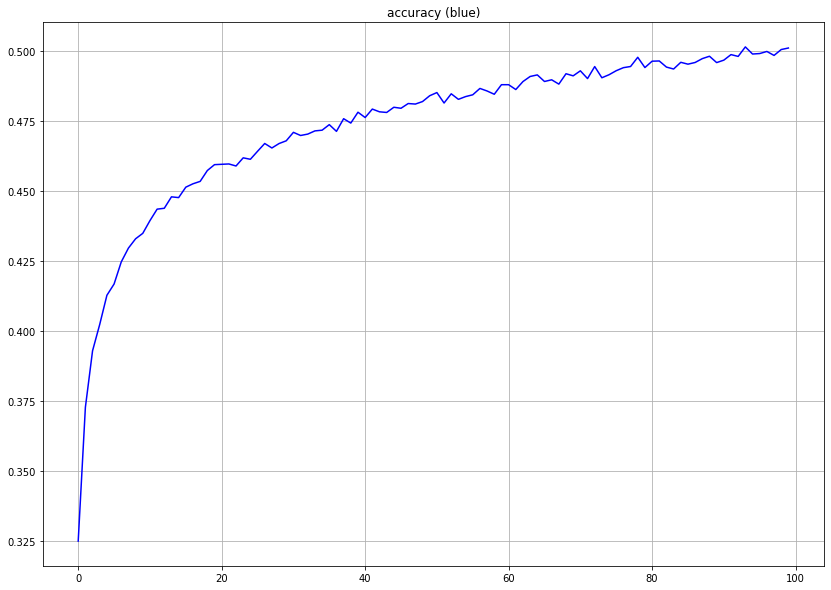

accuracy: [0.32495832443237305, 0.37275001406669617, 0.3929375112056732, 0.4023750126361847, 0.4127708375453949, 0.4167916774749756, 0.4246875047683716, 0.429625004529953, 0.43295833468437195, 0.4348958432674408, 0.43943750858306885, 0.44354167580604553, 0.4438541531562805, 0.4479374885559082, 0.4476666748523712, 0.45139583945274353, 0.45260417461395264, 0.45345833897590637, 0.4573333263397217, 0.4594374895095825, 0.4595625102519989, 0.4596875011920929, 0.45895832777023315, 0.46187499165534973, 0.46135416626930237, 0.46420833468437195, 0.46700000762939453, 0.46539583802223206, 0.46697917580604553, 0.46795833110809326, 0.47097915410995483, 0.4698541760444641, 0.4703541696071625, 0.4715000092983246, 0.4717499911785126, 0.4737291634082794, 0.4713333249092102, 0.47585415840148926, 0.4742916524410248, 0.4781666696071625, 0.4762708246707916, 0.4792916774749756, 0.47831249237060547, 0.4780833423137665, 0.47993749380111694, 0.4795833230018616, 0.48127081990242004, 0.48108333349227905, 0.481979

In [ ]:
#report accuracy
plt.figure( figsize=(14,10) )
plt.grid();  plt.title( 'accuracy (blue)'   );
plt.plot( h.history['accuracy'], 'b' ); 
plt.show()
print( "accuracy:", h.history["accuracy"] )

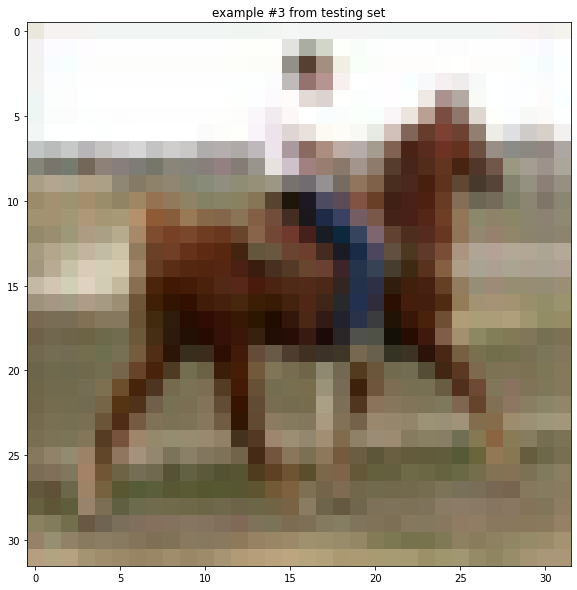

In [ ]:
# show a sample test image
plt.figure( figsize=(14,10) )
plt.title( 'example #' + str(which) + ' from testing set' )
plt.imshow( test_images[which], cmap=plt.cm.binary, interpolation='nearest' )
plt.grid( False )
plt.draw()
plt.show()

In [ ]:
#show sample prediction
print( 'actual class for test #', which, ':', test_labels[which], class_names[test_labels[which]] )
#get the image from the test dataset
img = x_test[ which ]
#add the image to a batch where it's the only member
img = ( np.expand_dims(img, 0) )
prediction = model.predict( img )
print( 'prediction vector for test image #' + str(which) + ':', prediction[0] )
print( 'subscript of maximal prediction:', np.argmax(prediction[0]), class_names[np.argmax(prediction[0])] )

actual class for test # 3 : 7 horse
prediction vector for test image #3: [2.2409654e-03 3.0152535e-04 2.3257858e-03 1.2980205e-03 6.1199674e-03
 4.8245853e-03 1.4643425e-04 9.7991836e-01 4.7917532e-05 2.7764919e-03]
subscript of maximal prediction: 7 horse


# First Prediction

first 120 test images (errors in parens)


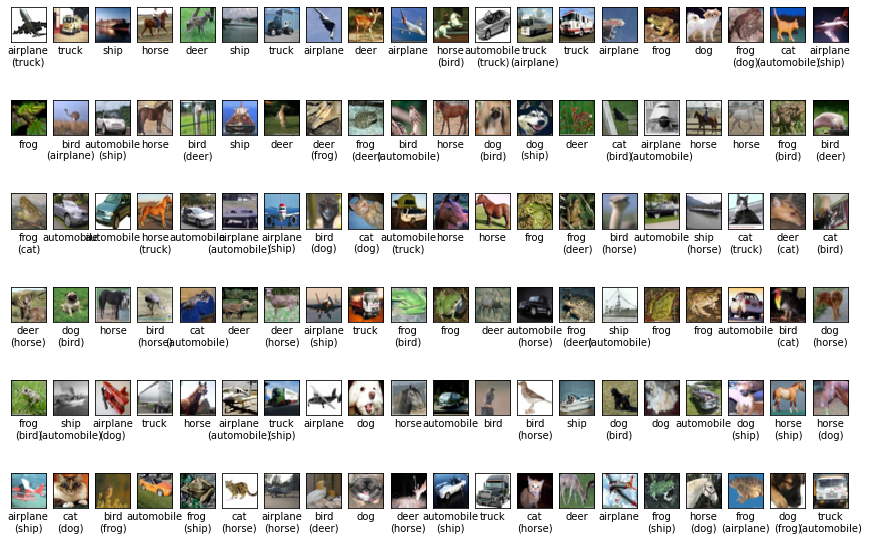

In [ ]:
#show first N=RxC test images
R =  6
C = 20
print( 'first ' + str(R*C) + ' test images (errors in parens)' )
plt.figure( figsize=(15, 10), num='first ' + str(R*C) + ' test images' )
plt.title( 'test images' )
for i in range( R*C ):
    img = x_test[i]
    img = ( np.expand_dims(img, 0) )
    prediction = model.predict( img )
    prediction = class_names[ np.argmax(prediction[0]) ]
    plt.subplot( R, C, i+1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.imshow( test_images[i], cmap=plt.cm.binary, interpolation='nearest' )
    if class_names[int(test_labels[i])] == prediction:
        plt.xlabel( class_names[int(test_labels[i])] )
    else:
        plt.xlabel( class_names[int(test_labels[i])] + "\n(" + prediction + ")" )
plt.savefig( out_file+'-first120.png' )
plt.show()

[Text(159.0, 0.5, 'Actual'), Text(0.5, 69.0, 'Predicted')]

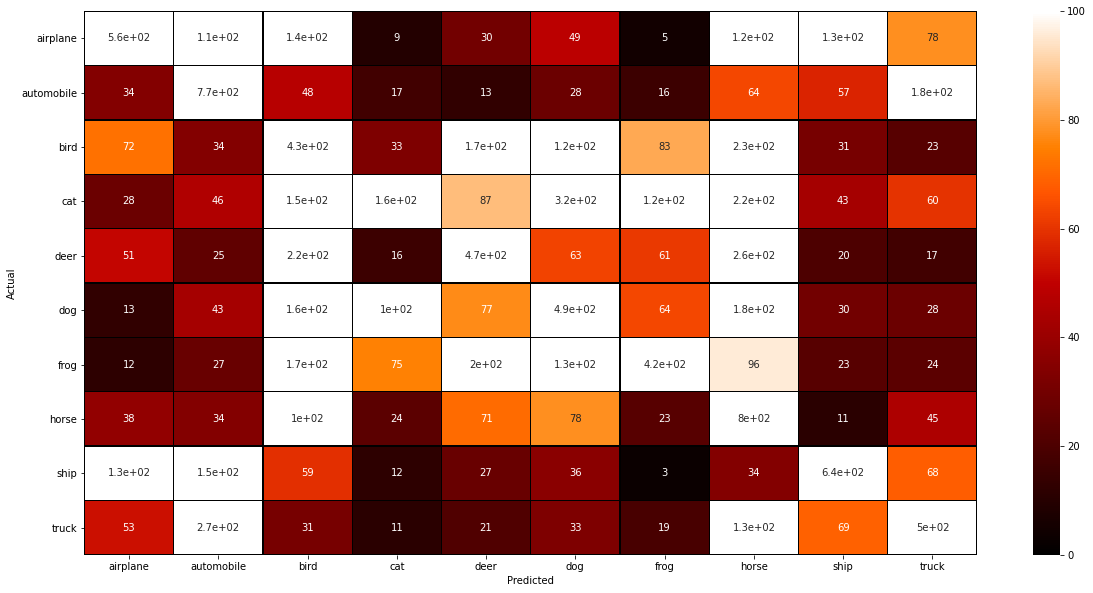

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=-1)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(cm, cmap='gist_heat', annot=True, xticklabels=class_names, yticklabels=class_names, vmax=100, vmin=0, linewidths=.3, linecolor='black')
heatmap.set(xlabel="Predicted", ylabel = "Actual")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.46      0.51      1222
           1       0.51      0.63      0.56      1229
           2       0.29      0.35      0.32      1232
           3       0.35      0.13      0.19      1229
           4       0.40      0.39      0.40      1201
           5       0.36      0.41      0.39      1190
           6       0.52      0.36      0.43      1179
           7       0.38      0.65      0.48      1226
           8       0.61      0.55      0.58      1151
           9       0.49      0.44      0.46      1141

    accuracy                           0.44     12000
   macro avg       0.45      0.44      0.43     12000
weighted avg       0.45      0.44      0.43     12000



**TODO #3 - Create Lists of Good and Bad Predictions**

---

Accuracy is pretty bad for this data set and model/

In [ ]:
bad = [y_pred[i] for i in range(len(y_pred)) if y_pred[i] != y_test[i]]
good = [y_pred[i] for i in range(len(y_pred)) if y_pred[i] == y_test[i]]

[ 427  739 1079  298  693  859  392 1329  412  525]


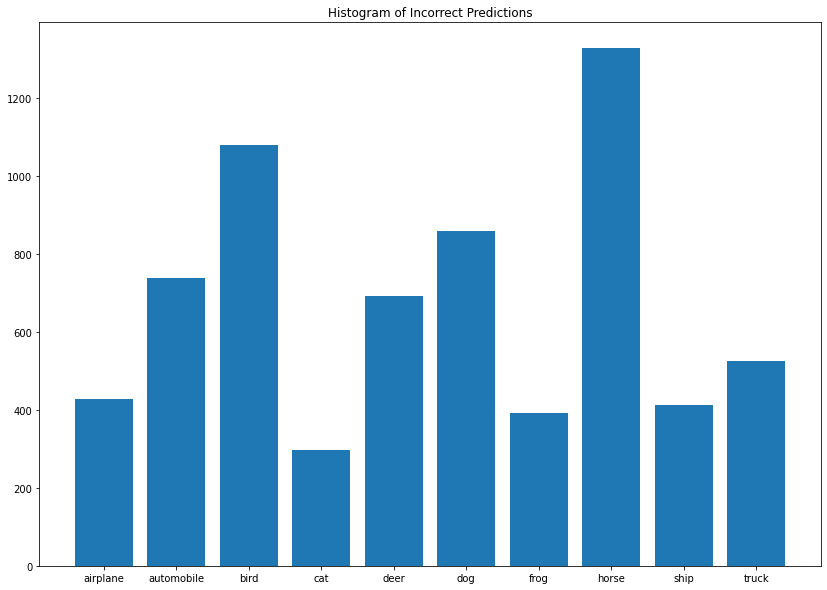

In [ ]:
h_bad = np.histogram( bad, len(class_names) )[0]
print( h_bad )
plt.figure( figsize=(14,10) )
plt.title( 'Histogram of Incorrect Predictions' )
plt.bar( class_names, h_bad )
plt.show()

[558 770 433 163 469 493 424 801 635 501]


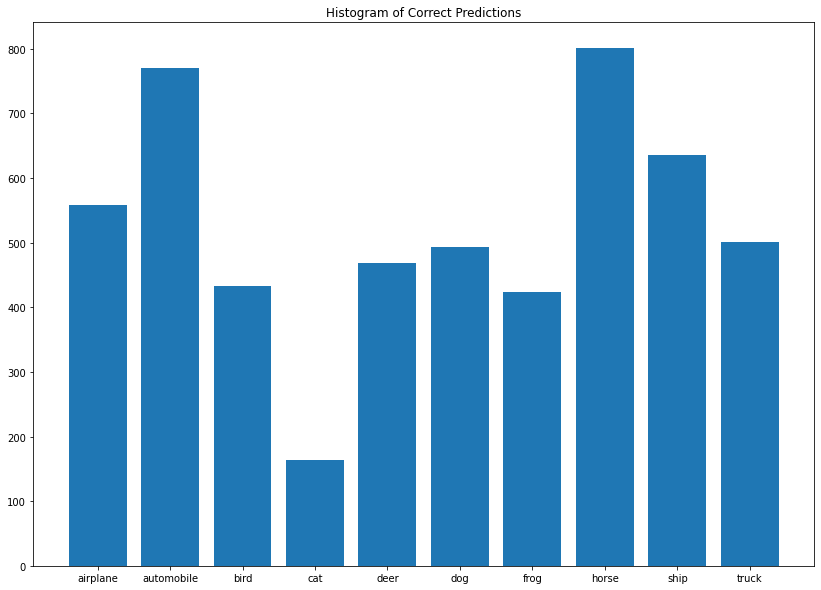

In [ ]:
h_good = np.histogram( good, len(class_names) )[0]
print( h_good )
plt.figure( figsize=(14,10) )
plt.title( 'Histogram of Correct Predictions' )
plt.bar( class_names, h_good )
plt.show()

[43.3502538071066, 48.972829688535455, 71.36243386243386, 64.64208242950109, 59.63855421686747, 63.53550295857988, 48.03921568627451, 62.394366197183096, 39.350525310410696, 51.16959064327485]


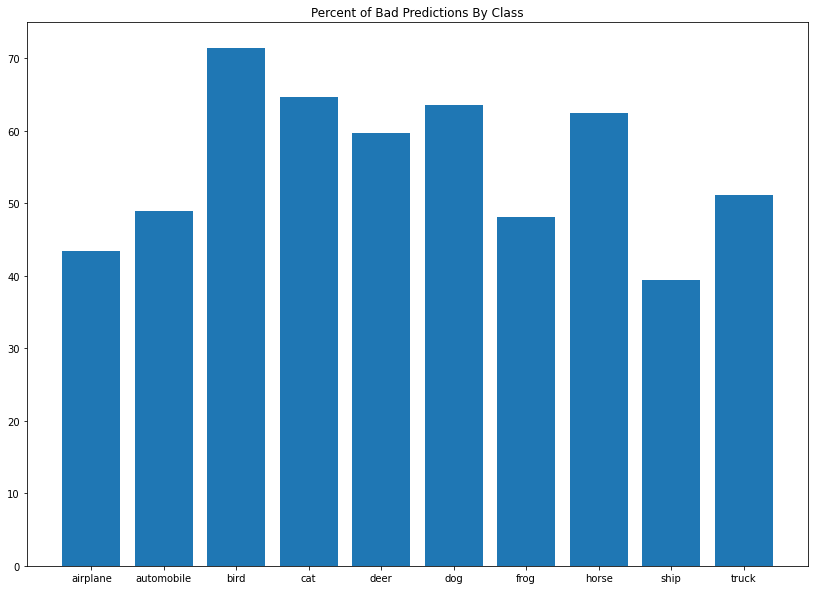

In [ ]:
pct_bad = [(h_bad[i]*100/(h_bad[i] +  h_good[i])) for i in range(len(h_good))]
print(pct_bad)
plt.figure( figsize=(14,10) )
plt.title( 'Percent of Bad Predictions By Class' )
plt.bar( class_names, pct_bad )
plt.show()

# Increase Noise

**TODO #4 - Create Noisy Test Data**

---

Create noisy test data. Noise is added 10 times iteratively, resulting in 11 sets of test data with increasing amounts of noise.  These sets will be represented as noise levels 0-10 with noise level 0 being the original noiseless test data.  


---

For cifar10, I'm only using 10 iterations because 20 uses all the RAM available to the runtime and crashed CoLab.

In [ ]:
np.random.seed(17)

zeroes = np.zeros((len(x_test), img_rows, img_cols, channels))
ones = zeroes + 1

noisy_test_sets = list()

#Base noiseless data
noisy_test_sets.append(x_test)
noisy_x_test = x_test

for i in range(0, 10):
  noise = np.random.normal(0, .1, x_test.shape)
  noisy_x_test = noisy_x_test + noise
  noisy_x_test = np.minimum(noisy_x_test, ones)
  noisy_x_test = np.maximum(noisy_x_test, zeroes)

  noisy_test_sets.append(noisy_x_test)
  # Reshape and multiply by 255 to get images for display



In [ ]:
noise_accuracy_scores = list()
noisy_predictions = list()
noise_classification_data = list()

for test_set in noisy_test_sets:
  pred = np.argmax(model.predict(test_set), axis=-1)
  noise_accuracy_scores.append(accuracy_score(y_test, pred))
  noise_classification_data.append(classification_report(y_test, pred))
  noisy_predictions.append(pred)


In [ ]:
print(noise_accuracy_scores)

[0.43725, 0.42325, 0.41233333333333333, 0.39975, 0.38625, 0.37533333333333335, 0.3635, 0.3526666666666667, 0.3448333333333333, 0.332, 0.32225]


**Display Noisy Images at the Noise Level 1**

---

Low noise levels leave the images still easily identifiable.

first 120 test images (errors in parens)


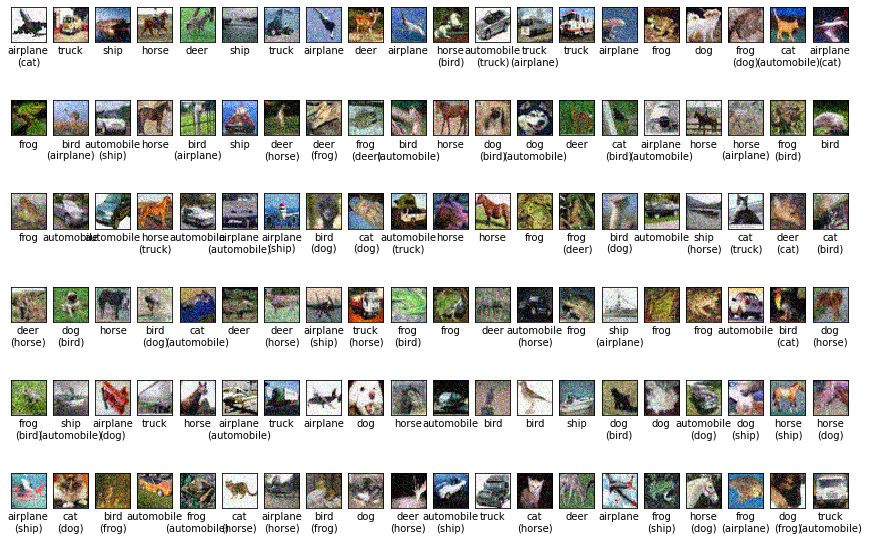

In [ ]:
#show first N=RxC test images
R =  6
C = 20
print( 'first ' + str(R*C) + ' test images (errors in parens)' )
plt.figure( figsize=(15, 10), num='first ' + str(R*C) + ' test images' )
plt.title( 'test images' )
for i in range( R*C ):
    img = noisy_test_sets[1][i]
    img = ( np.expand_dims(img, 0) )
    prediction = model.predict( img )
    prediction = class_names[ np.argmax(prediction[0]) ]
    plt.subplot( R, C, i+1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.imshow( noisy_test_sets[1][i], cmap=plt.cm.binary, interpolation='nearest' )
    if class_names[int(test_labels[i])] == prediction:
        plt.xlabel( class_names[int(test_labels[i])] )
    else:
        plt.xlabel( class_names[int(test_labels[i])] + "\n(" + prediction + ")" )
plt.savefig( out_file+'-first120.png' )
plt.show()

**Display Noisy Images at the Maximum Noise Level**

---

Some images are easy to identify, but others are unreadable.  The colors make it much harder to read than just noisy gray data.

first 120 test images (errors in parens)


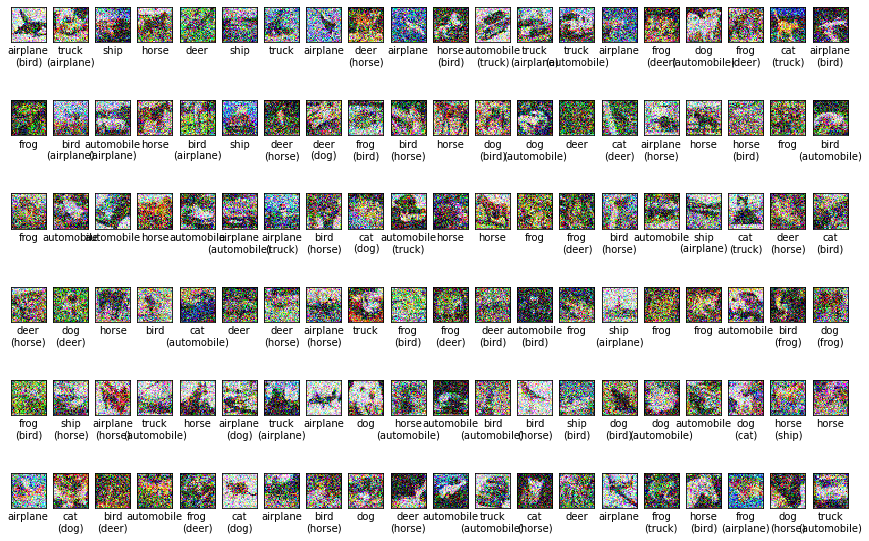

In [ ]:
#show first N=RxC test images
R =  6
C = 20
print( 'first ' + str(R*C) + ' test images (errors in parens)' )
plt.figure( figsize=(15, 10), num='first ' + str(R*C) + ' test images' )
plt.title( 'test images' )
for i in range( R*C ):
    img = noisy_test_sets[9][i]
    img = ( np.expand_dims(img, 0) )
    prediction = model.predict( img )
    prediction = class_names[ np.argmax(prediction[0]) ]
    plt.subplot( R, C, i+1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.imshow( noisy_test_sets[9][i], cmap=plt.cm.binary, interpolation='nearest' )
    if class_names[int(test_labels[i])] == prediction:
        plt.xlabel( class_names[int(test_labels[i])] )
    else:
        plt.xlabel( class_names[int(test_labels[i])] + "\n(" + prediction + ")" )
plt.savefig( out_file+'-first120.png' )
plt.show()

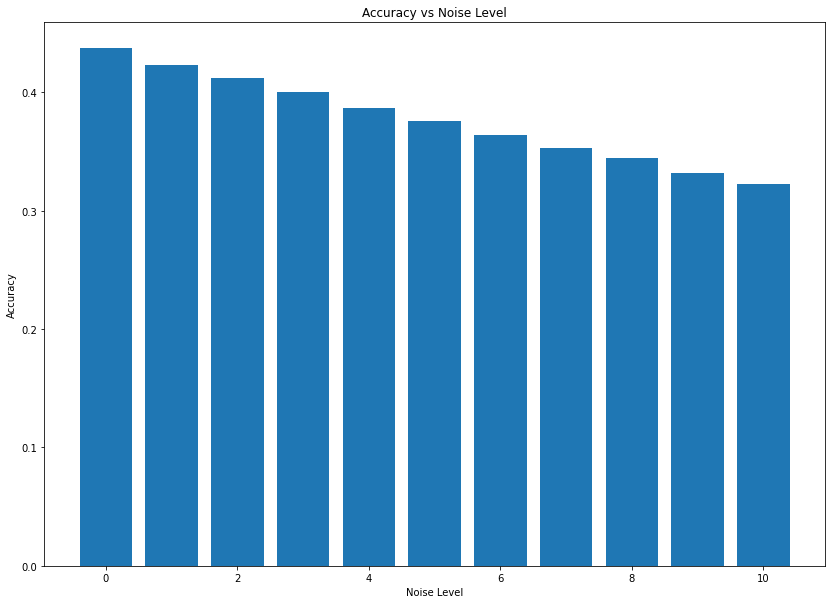

In [ ]:
plt.figure( figsize=(14,10) )
plt.title( 'Accuracy vs Noise Level' )
plt.bar( np.arange(0, 11), noise_accuracy_scores )
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.show()

# Increase Depth of Neural Network

---

Problem #5 in the assignment

In [ ]:
deep_model = keras.Sequential()
deep_model.add( keras.layers.Flatten( input_shape=input_shape) )
deep_model.add( keras.layers.Dense( 128, activation='relu') )
deep_model.add( keras.layers.Dense( 64, activation='relu') )
deep_model.add( keras.layers.Dense( 32, activation='relu') )
deep_model.add( keras.layers.Dense( len(class_names), activation='softmax' ) )
deep_model.compile( optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'] )

In [ ]:
ep = 100
start_2 = time()
h = deep_model.fit( x_train, y_train, epochs=ep, callbacks=[tensorboard_callback], validation_data=(x_test, y_test))  #randomizes by default
elapsed_training_time_deep = time() - start_2

Epoch 1/100
1500/1500 [==============================] - 7s 5ms/step - loss: 2.0186 - accuracy: 0.2496 - val_loss: 1.8189 - val_accuracy: 0.3358
Epoch 2/100
1500/1500 [==============================] - 7s 4ms/step - loss: 1.7548 - accuracy: 0.3698 - val_loss: 1.6725 - val_accuracy: 0.3964
Epoch 3/100
1500/1500 [==============================] - 7s 4ms/step - loss: 1.6654 - accuracy: 0.4042 - val_loss: 1.6155 - val_accuracy: 0.4178
Epoch 4/100
1500/1500 [==============================] - 7s 4ms/step - loss: 1.6034 - accuracy: 0.4245 - val_loss: 1.5832 - val_accuracy: 0.4392
Epoch 5/100
1500/1500 [==============================] - 7s 4ms/step - loss: 1.5647 - accuracy: 0.4380 - val_loss: 1.5951 - val_accuracy: 0.4325
Epoch 6/100
1500/1500 [==============================] - 7s 4ms/step - loss: 1.5481 - accuracy: 0.4436 - val_loss: 1.6014 - val_accuracy: 0.4275
Epoch 7/100
1500/1500 [==============================] - 7s 5ms/step - loss: 1.5113 - accuracy: 0.4553 - val_loss: 1.5459 - val_ac

In [ ]:
model.save('cifar_deep.h5')

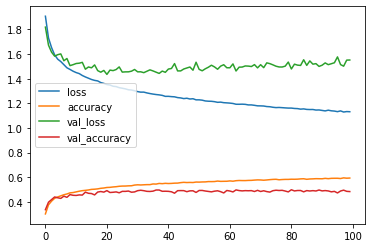

In [ ]:
pd.DataFrame(deep_model.history.history).plot()

In [ ]:
print(elapsed_training_time_deep)

690.5493564605713


In [ ]:
noise_accuracy_scores_deep = list()
noisy_predictions_deep = list()
noisy_classification_data_deep = list()

for test_set in noisy_test_sets:
  pred = np.argmax(deep_model.predict(test_set), axis=-1)
  noise_accuracy_scores_deep.append(accuracy_score(y_test, pred))
  noisy_classification_data_deep.append(classification_report(y_test, pred))
  noisy_predictions_deep.append(pred)

In [ ]:
print(noisy_classification_data_deep[0])

              precision    recall  f1-score   support

           0       0.61      0.51      0.56      1222
           1       0.66      0.51      0.58      1229
           2       0.42      0.25      0.31      1232
           3       0.33      0.35      0.34      1229
           4       0.41      0.48      0.45      1201
           5       0.41      0.38      0.39      1190
           6       0.41      0.65      0.50      1179
           7       0.57      0.54      0.56      1226
           8       0.59      0.66      0.62      1151
           9       0.51      0.50      0.50      1141

    accuracy                           0.48     12000
   macro avg       0.49      0.48      0.48     12000
weighted avg       0.49      0.48      0.48     12000



In [ ]:
print(noise_accuracy_scores_deep)

[0.483, 0.4741666666666667, 0.462, 0.4455, 0.43983333333333335, 0.42491666666666666, 0.41783333333333333, 0.40425, 0.39641666666666664, 0.385, 0.38208333333333333]


**Histograms For Good and Bad Predictions of Noisless Test Data**

---
Accuracy for noisless data is much worse than the other two datasets.


In [ ]:
bad = [noisy_predictions_deep[0][i] for i in range(len(noisy_predictions_deep[0])) if noisy_predictions_deep[0][i] != y_test[i]]
good = [noisy_predictions_deep[0][i] for i in range(len(noisy_predictions_deep[0])) if noisy_predictions_deep[0][i] == y_test[i]]
print(len(good))
print(len(bad))

5796
6204


[ 398  324  428  873  821  657 1116  494  532  561]


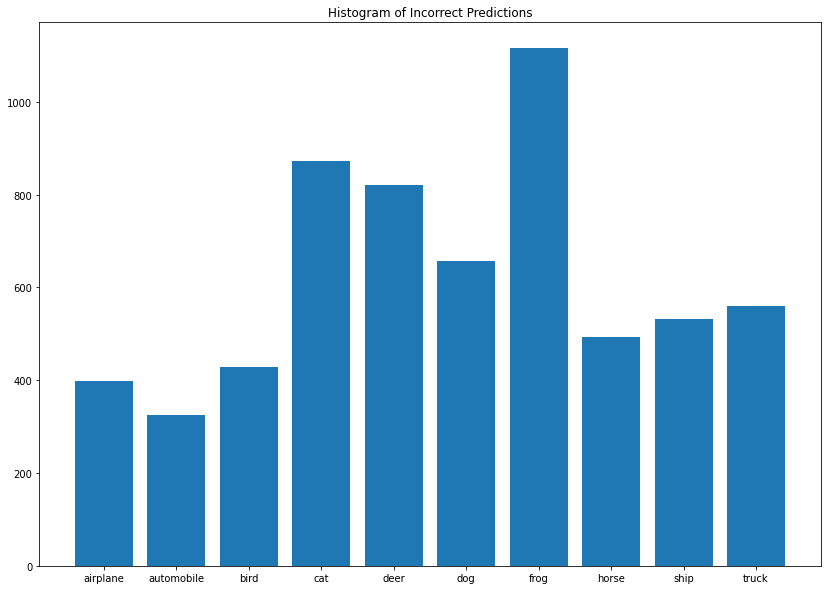

In [ ]:
h_bad = np.histogram( bad, len(class_names) )[0]
print( h_bad )
plt.figure( figsize=(14,10) )
plt.title( 'Histogram of Incorrect Predictions' )
plt.bar( class_names, h_bad )
plt.show()

[626 632 305 431 582 450 769 667 761 573]


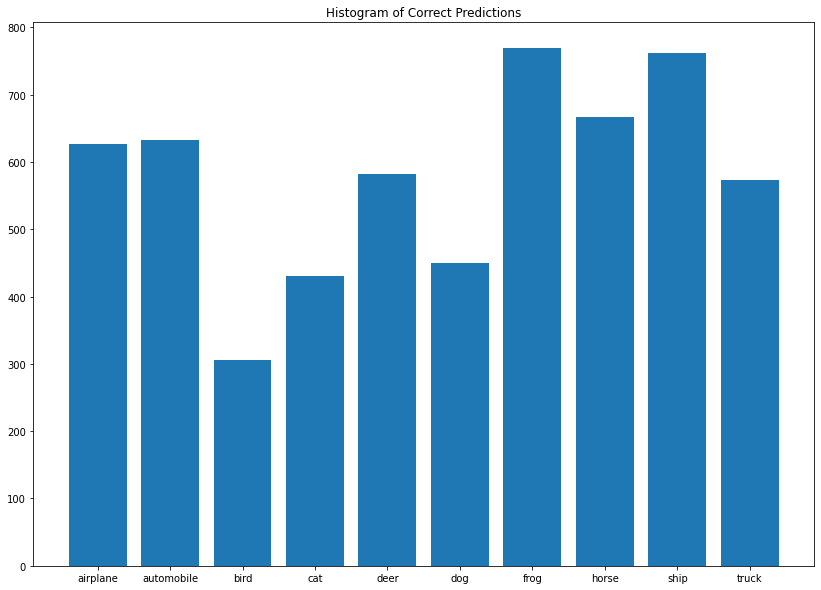

In [ ]:
h_good = np.histogram( good, len(class_names) )[0]
print( h_good )
plt.figure( figsize=(14,10) )
plt.title( 'Histogram of Correct Predictions' )
plt.bar( class_names, h_good )
plt.show()

[38.8671875, 33.89121338912134, 58.39017735334243, 66.9478527607362, 58.51746258018532, 59.34959349593496, 59.204244031830235, 42.549526270456504, 41.1446249033256, 49.47089947089947]


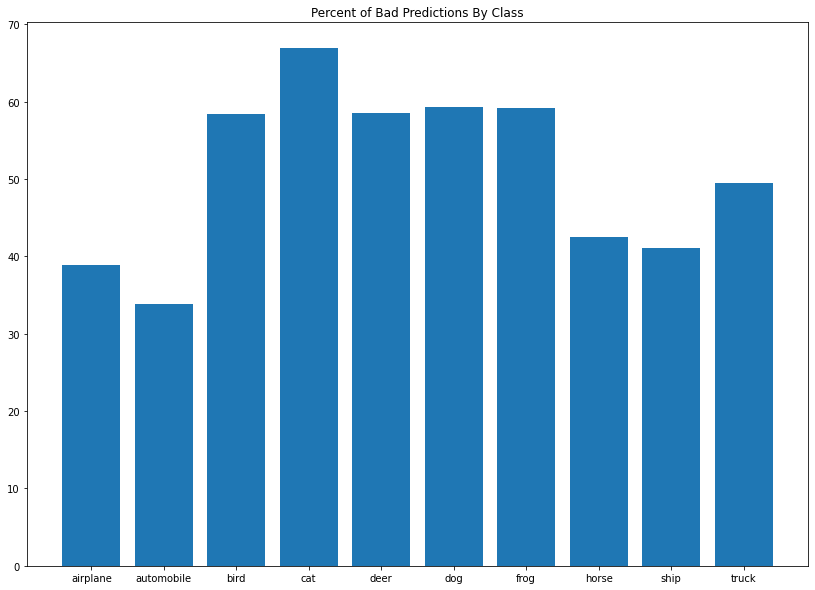

In [ ]:
pct_bad = [(h_bad[i]*100/(h_bad[i] +  h_good[i])) for i in range(len(h_good))]
print(pct_bad)
plt.figure( figsize=(14,10) )
plt.title( 'Percent of Bad Predictions By Class' )
plt.bar( class_names, pct_bad )
plt.show()

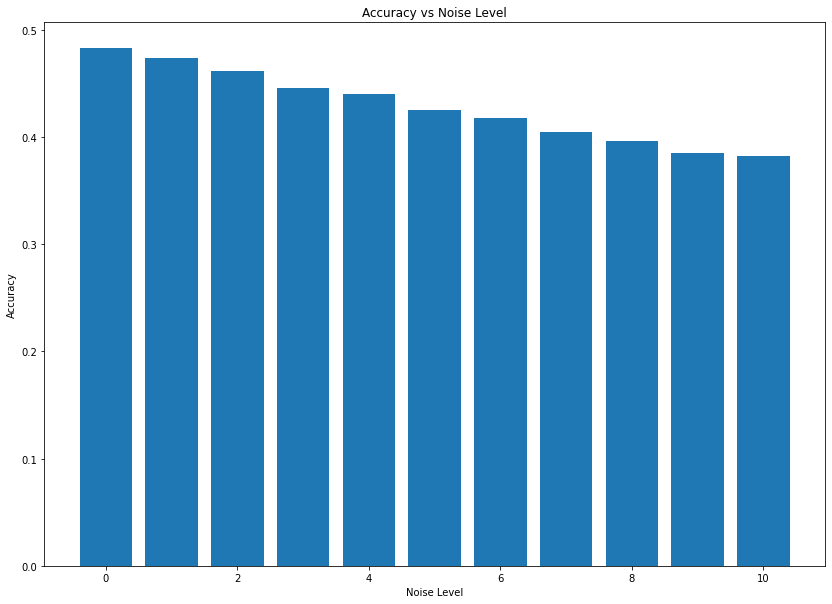

In [ ]:
plt.figure( figsize=(14,10) )
plt.title( 'Accuracy vs Noise Level' )
plt.bar( np.arange(0, 11), noise_accuracy_scores_deep )
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
accuracy_df = pd.DataFrame(noise_accuracy_scores_deep)
accuracy_df.to_csv('cifar_accuracy.csv')

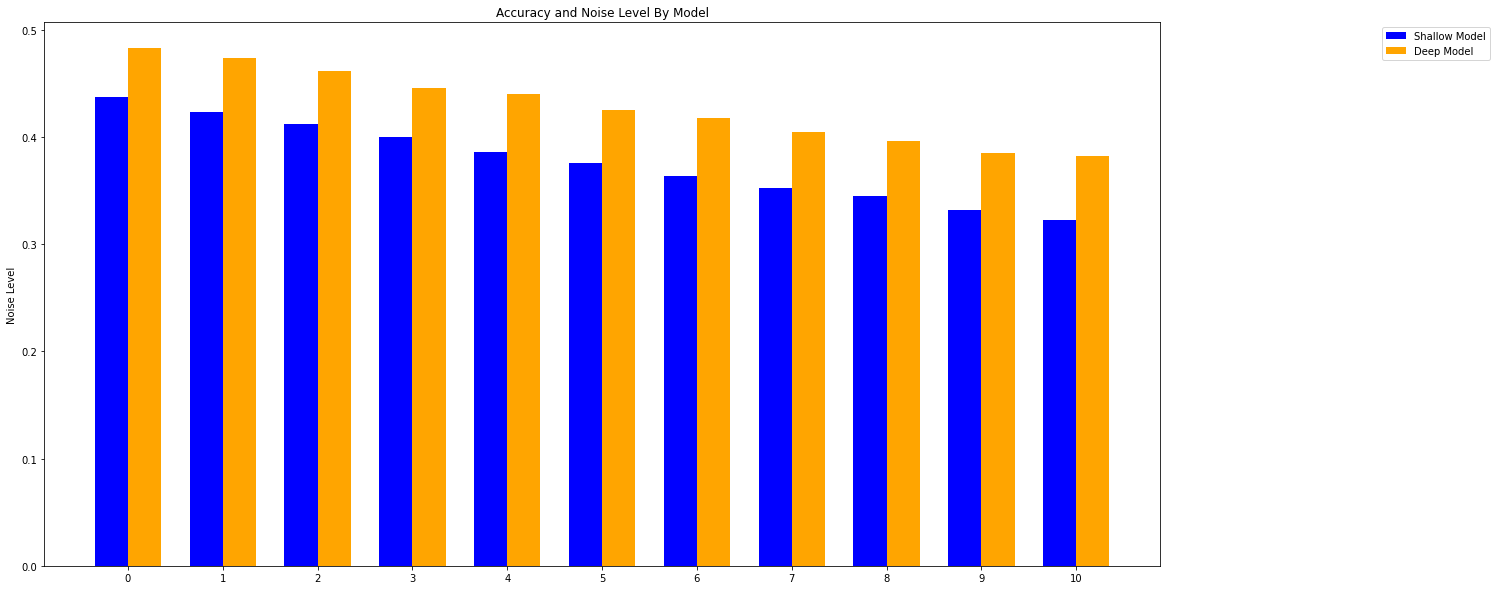

In [ ]:
labels = np.arange(0, 11)

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width/2, noise_accuracy_scores, width, label='Shallow Model', color='blue')
rects2 = ax.bar(x + width/2, noise_accuracy_scores_deep, width, label='Deep Model', color='orange')

ax.set_ylabel('Accuracy')
ax.set_ylabel('Noise Level')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')
plt.title('Accuracy and Noise Level By Model')
plt.show()